## **Submission**

### **Import The Required Libaraies**

In [144]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error,root_mean_squared_error, r2_score

import joblib

### **EDA**

In [145]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,average_score
0,male,group D,associate's degree,free/reduced,completed,80.333333
1,female,group C,some college,standard,completed,75.666667
2,male,group C,some college,free/reduced,none,65.666667
3,female,group D,master's degree,free/reduced,completed,57.333333
4,female,group A,some college,standard,completed,77.666667


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       700 non-null    object 
 1   race/ethnicity               700 non-null    object 
 2   parental level of education  700 non-null    object 
 3   lunch                        700 non-null    object 
 4   test preparation course      700 non-null    object 
 5   average_score                700 non-null    float64
dtypes: float64(1), object(5)
memory usage: 32.9+ KB


In [147]:
df = df.rename(columns = {"race/ethnicity":"ethnicity","parental level of education":"parental_level_of_education","test preparation course":"test_preparation_course"})

In [148]:
df.shape

(700, 6)

In [149]:
df.isna().sum()

gender                         0
ethnicity                      0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
average_score                  0
dtype: int64

In [150]:
df.duplicated().sum()

np.int64(10)

In [151]:
duplicated_rows= df[df.duplicated(keep=False)]
print(duplicated_rows)

     gender ethnicity parental_level_of_education     lunch  \
13     male   group C                some college  standard   
22   female   group C          associate's degree  standard   
48   female   group C           bachelor's degree  standard   
75     male   group D          associate's degree  standard   
94   female   group C                some college  standard   
128    male   group E                some college  standard   
132  female   group C                some college  standard   
180  female   group C                some college  standard   
267  female   group C          associate's degree  standard   
269    male   group A            some high school  standard   
271    male   group E                some college  standard   
320    male   group E           bachelor's degree  standard   
337  female   group C                some college  standard   
340    male   group C                some college  standard   
399    male   group A            some high school  stan

In [152]:
df.drop_duplicates(inplace = True )

In [153]:
df.duplicated().sum()

np.int64(0)

In [154]:
df.nunique()

gender                           2
ethnicity                        5
parental_level_of_education      6
lunch                            2
test_preparation_course          2
average_score                  181
dtype: int64

In [155]:
for column in df.columns:
    if column != "average_score" :
        val = df[column].unique()
        print(f"Unique Values of {column} : {val}")
    else:
        break

Unique Values of gender : ['male' 'female']
Unique Values of ethnicity : ['group D' 'group C' 'group A' 'group E' 'group B']
Unique Values of parental_level_of_education : ["associate's degree" 'some college' "master's degree" 'high school'
 "bachelor's degree" 'some high school']
Unique Values of lunch : ['free/reduced' 'standard']
Unique Values of test_preparation_course : ['completed' 'none']


#### **Encoding**

In [156]:
df = pd.get_dummies(df, columns = ["ethnicity","parental_level_of_education","test_preparation_course","lunch","gender"], prefix = ["ethnicity","parental_level_of_education","test_preparation_course","lunch","gender"], drop_first = True )

In [157]:
df.head()

,average_score,ethnicity_group B,ethnicity_group C,ethnicity_group D,ethnicity_group E,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,test_preparation_course_none,lunch_standard,gender_male
0,80.333333,False,False,True,False,False,False,False,False,False,False,False,True
1,75.666667,False,True,False,False,False,False,False,True,False,False,True,False
2,65.666667,False,True,False,False,False,False,False,True,False,True,False,True
3,57.333333,False,False,True,False,False,False,True,False,False,False,False,False
4,77.666667,False,False,False,False,False,False,False,True,False,False,True,False


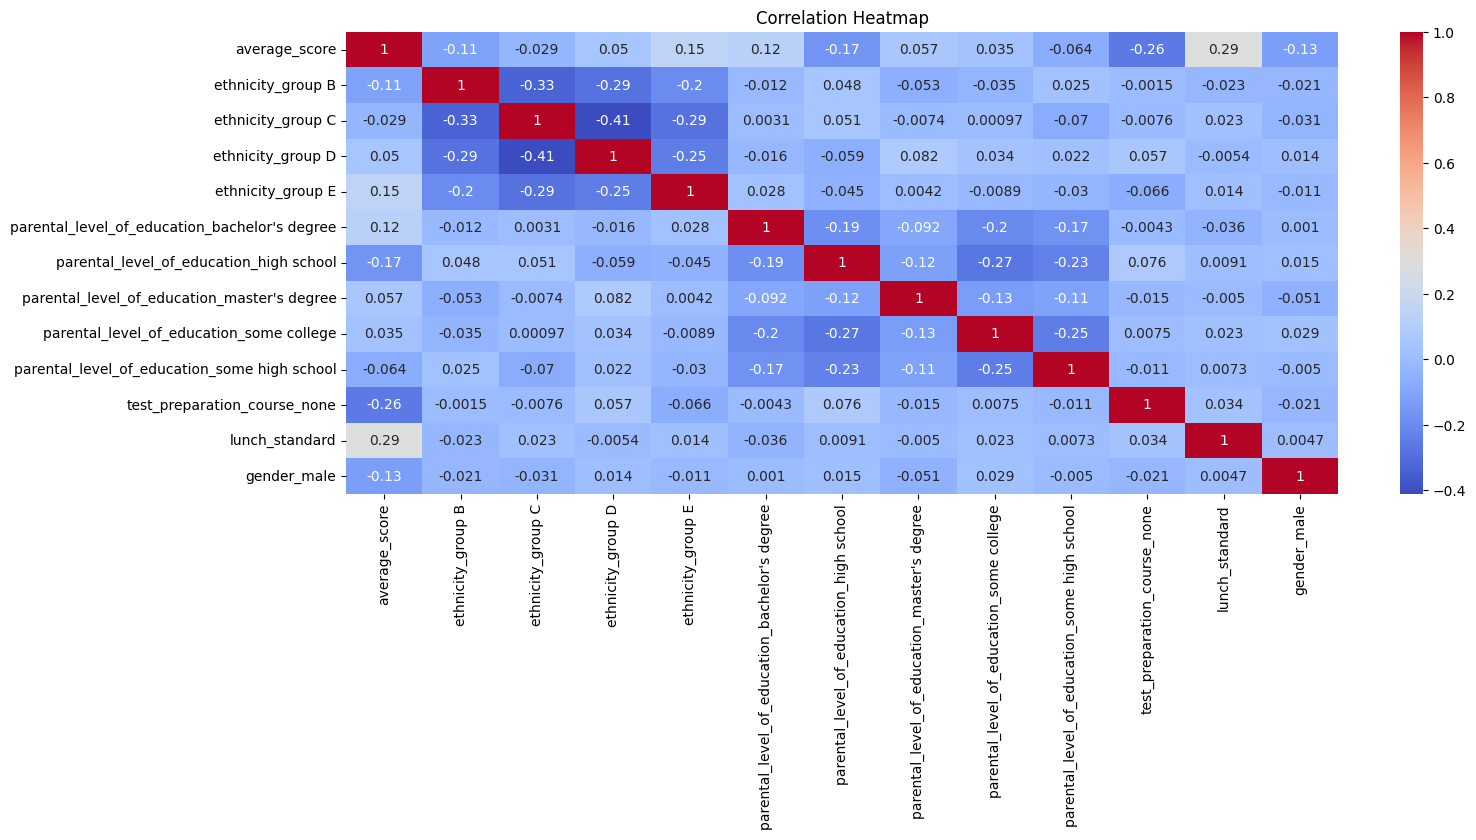

In [158]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig("Correlation Heatmap.png", dpi = 300, format = "png", bbox_inches = "tight")
plt.show()

### **Spliting into sets**

In [159]:
X = df.drop(columns = ["average_score"])
y = df["average_score"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state = 42)

In [160]:
print(f"Shape of X : {X_scaled.shape}")
print(f"Shape of y : {y.shape}")

Shape of X : (690, 12)
Shape of y : (690,)


### **Model Initialization and Training**

In [161]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### **Model Evaluation**

In [162]:
#Model Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [163]:
# Training Set Evaluation
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = root_mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Training Set Performance:")
print(f"Mean Squared Error: {mse_train:.4f}")
print(f"Root Mean Squared Error: {rmse_train:.4f}")
print(f"Mean Absolute Error: {mae_train:.4f}")
print(f"R2 Score: {r2_train:.4f}")

# Evaluate on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nTest Set Performance:")
print(f"Mean Squared Error: {mse_test:.4f}")
print(f"Root Mean Squared Error: {rmse_test:.4f}")
print(f"Mean Absolute Error: {mae_test:.4f}")
print(f"R2 Score: {r2_test:.4f}")

Training Set Performance:
Mean Squared Error: 149.8820
Root Mean Squared Error: 12.2426
Mean Absolute Error: 9.9619
R2 Score: 0.2231

Test Set Performance:
Mean Squared Error: 143.0177
Root Mean Squared Error: 11.9590
Mean Absolute Error: 9.5876
R2 Score: 0.2867


### **Feauture Importance**

In [164]:
coefficients = model.coef_
features = X.columns
feature_importance = pd.DataFrame({"Feature": features, "Coefficient":coefficients})
feature_importance["Importance"] = feature_importance["Coefficient"].abs()
feature_importance = feature_importance.sort_values(by = "Importance", ascending = False)
feature_importance

,Feature,Coefficient,Importance
10,lunch_standard,4.013966,4.013966
9,test_preparation_course_none,-3.857937,3.857937
3,ethnicity_group E,1.845714,1.845714
11,gender_male,-1.712750,1.712750
5,parental_level_of_education_high school,-1.596376,1.596376
2,ethnicity_group D,1.433647,1.433647
8,parental_level_of_education_some high school,-0.995640,0.995640
4,parental_level_of_education_bachelor's degree,0.990099,0.990099
1,ethnicity_group C,0.615868,0.615868
0,ethnicity_group B,-0.511568,0.511568


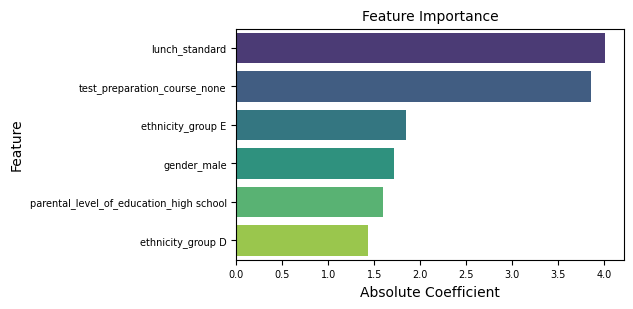

In [165]:
# Visualizing the feature importance
plt.figure(figsize=(5, 3))
sns.barplot( data = feature_importance.head(6), x='Importance', y='Feature', palette='viridis', orient = "h")
plt.title('Feature Importance', fontsize = 10)
plt.xlabel("Absolute Coefficient",fontsize = 10)
plt.ylabel("Feature",fontsize = 10)
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 7)
plt.savefig("Horizontal Bar Plot Repping Feature Importance.png", dpi = 300, format = "png", bbox_inches = "tight")
plt.show()

### **Saving the Model**

In [166]:
joblib.dump(model,"linear_model.joblib")

['linear_model.joblib']

## **Function**

In [167]:
def predict_scores(raw_data):
    model = joblib.load("linear_model.joblib")
    data = raw_data.drop(columns = "average_score")
    df = data
    df = df.rename(columns = {"race/ethnicity":"ethnicity","parental level of education":"parental_level_of_education","test preparation course":"test_preparation_course"})
    df = pd.get_dummies(df, columns = ["ethnicity","parental_level_of_education","test_preparation_course","lunch","gender"], prefix = ["ethnicity","parental_level_of_education","test_preparation_course","lunch","gender"], drop_first = True )
    predictions = model.predict(df)
    data["average_score"] = pd.DataFrame(predictions)
    return data

### **Testing the function**

In [168]:
raw_data = pd.read_csv("StudentsPerformance.csv")

In [169]:
predict_scores(raw_data)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,average_score
0,male,group D,associate's degree,free/reduced,completed,67.905206
1,female,group C,some college,standard,completed,72.357114
2,male,group C,some college,free/reduced,none,62.772460
3,female,group D,master's degree,free/reduced,completed,70.023965
4,female,group A,some college,standard,completed,71.741246
...,...,...,...,...,...,...
695,female,group D,master's degree,standard,none,70.179994
696,male,group C,bachelor's degree,standard,none,68.233555
697,female,group C,associate's degree,standard,none,68.956207
698,male,group C,some college,free/reduced,completed,66.630397
